<h1>Higgs Boson Challenge</h1>
<img src="images/title.png" alt="Drawing" style="width: 350px;">

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from prepare import prepare_data
from model import Model
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import xgboost as xgb

<h1>The Statistical Model</h1>

Each collision event is characterized by a vector of measurements $\mathbf{x} \in \mathbb{R}^{30}$ (the feature vector). The event leads to two possible outcomes, either a Higgs boson or background noise were emitted. The outcomes are identified by a label vector $y \in \mathbb{B}$. The ultimate goal is to maximize the approximated median significance of the detection, given by:

$$
\text{AMS} = \sqrt{2 \left(s + b + b_{\text{reg}}\right) \log \left(1 + \frac{s}{b + b_{\text{reg}}}\right) - s},
$$

where $s$ and $b$ are the unbiased estimators of the average number of Higgs bosons emmisions and background noise detection

<h1>Our Solution</h1>

In [2]:
# _tmp = "/home/jmenard/McGill_PhysicsHack" 
DATA_PATH = "atlas-higgs-challenge-2014-v2.csv"

df, X_train, y_train, W_train, X_val, y_val, W_val, X_test, y_test, W_test = prepare_data(DATA_PATH)

In [3]:
print("Number of Features: {0}".format(X_train.shape[1]))
print("Number of train samples: {0}".format(X_train.shape[0]))
print("Number of validation samples: {0}".format(X_val.shape[0]))
print("Number of test samples: {0}".format(X_test.shape[0]))

Number of Features: 30
Number of train samples: 250000
Number of validation samples: 100000
Number of test samples: 450000


In [4]:
scale_pos_weight = (y_train[y_train["Label"]==1].count()/y_train[y_train["Label"]==0].count()).values[0]
evals_result = {}
params = {'max_depth': 10, 'eta': 0.01, 'gamma': 0.8,
          'subsample': 0.6, 'eval_metric': ['auc', 'error'],
          'lambda': 25, 'growth_policy': 'depthwise', 'silent': 1, 
          'objective': 'binary:logistic', 'scale_pos_weight': scale_pos_weight}
model = Model(params)

In [5]:
# model.fit(X_train, y_train, X_val, y_val, num_rounds=100)
model.load_model('xgb_classifier.model')
y_pred = model.predict(X_train)

In [6]:
# model.save_model("xgb_classifier.model")
model.score(W_train, y_pred, y_train, 0.6)

1.9366861731072698

In [7]:
# model.plot_evals_result()

In [8]:
interact(model.plot_histogram, cutoff=(0.1,0.95,0.05), 
          W=fixed(W_train), X_train=fixed(X_train), y_train=fixed(y_train))


interactive(children=(FloatSlider(value=0.5, description='cutoff', max=0.95, min=0.1, step=0.05), Output()), _…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

In [9]:
cutoff=0.6
y_pred = model.predict(X_test)
model.score(W_test, y_pred, y_test, cutoff)

2.4784268788501698

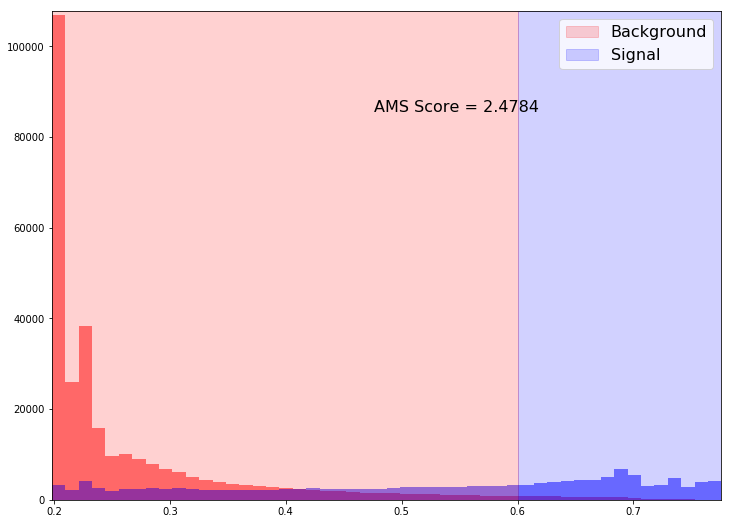

In [10]:
model.plot_histogram(W_test, X_test, y_test, cutoff)

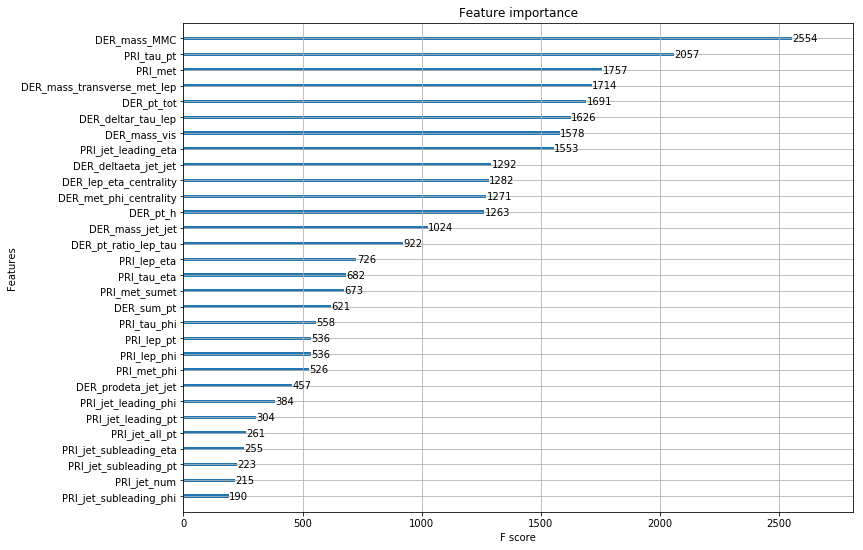

In [11]:
model.plot_importance()

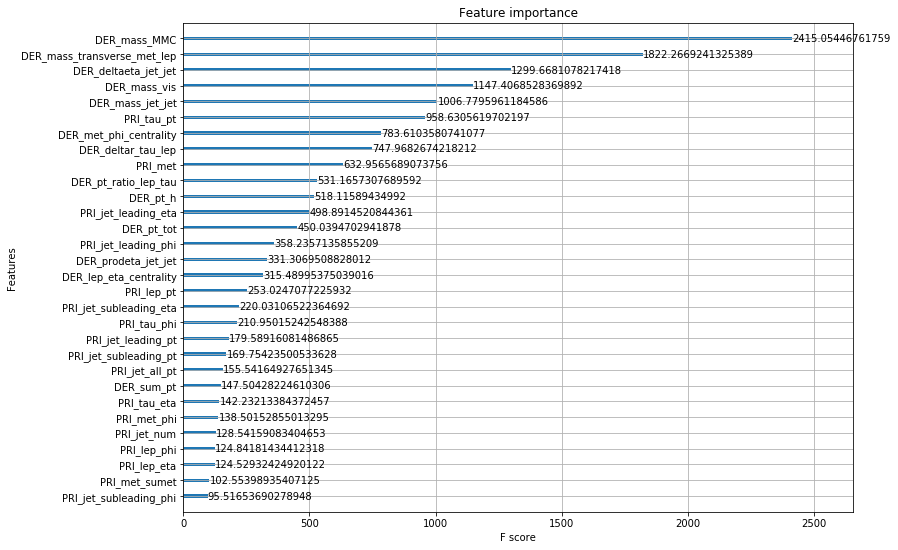

In [12]:
model.plot_importance(importance_type="cover")

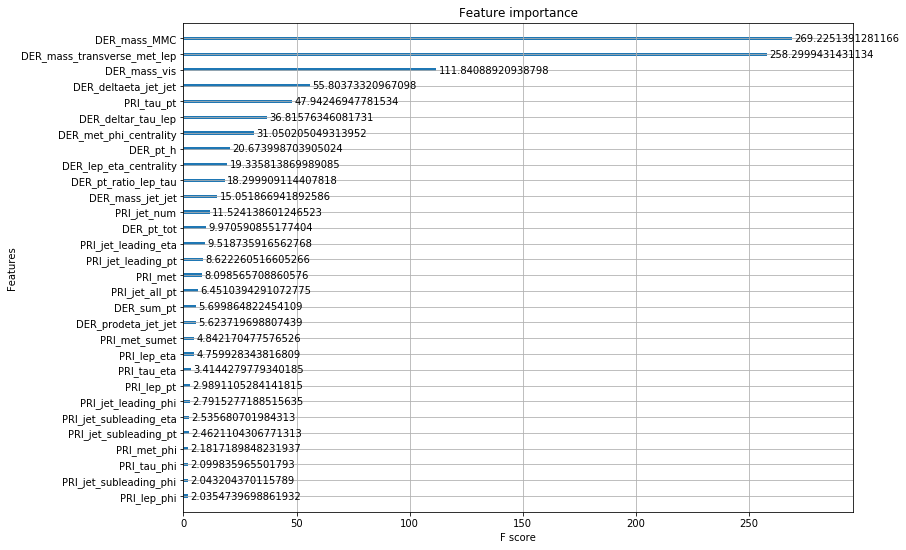

In [13]:
model.plot_importance(importance_type="gain")